In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Importing data
data = pd.read_csv("universities_data.csv")
data.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,"-865,685","3,478,337",Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,"-868,092","3,350,223",Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,"-86,174","3,236,261",Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,"-866,384","3,472,282",Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,"-862,957","3,236,432",Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [3]:
print(data.shape)
print(data.info())

(1534, 145)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Columns: 145 entries, ID number to Endowment assets (year end) per FTE enrollment (FASB)
dtypes: float64(114), int64(2), object(29)
memory usage: 1.7+ MB
None


In [4]:
print(data.isna().sum().sort_values(ascending = False))

Endowment assets (year end) per FTE enrollment (GASB)      1018
SAT Writing 25th percentile score                           820
SAT Writing 75th percentile score                           820
Number of first-time undergraduates - foreign countries     623
Percent of first-time undergraduates - out-of-state         623
                                                           ... 
Level of institution                                          0
Control of institution                                        0
Historically Black College or University                      0
Tribal college                                                0
State abbreviation                                            0
Length: 145, dtype: int64


Endowment assets (year end) per FTE enrollment (GASB)       66.362451
SAT Writing 25th percentile score                           53.455020
SAT Writing 75th percentile score                           53.455020
Number of first-time undergraduates - foreign countries     40.612777
Percent of first-time undergraduates - out-of-state         40.612777
Number of first-time undergraduates - out-of-state          40.612777
Percent of first-time undergraduates - in-state             40.612777
Number of first-time undergraduates - in-state              40.612777
Number of first-time undergraduates - residence unknown     40.612777
Percent of first-time undergraduates - residence unknown    40.612777
Percent of first-time undergraduates - foreign countries    40.612777
Endowment assets (year end) per FTE enrollment (FASB)       37.418514
SAT Critical Reading 75th percentile score                  23.794003
SAT Critical Reading 25th percentile score                  23.794003
SAT Math 75th percen

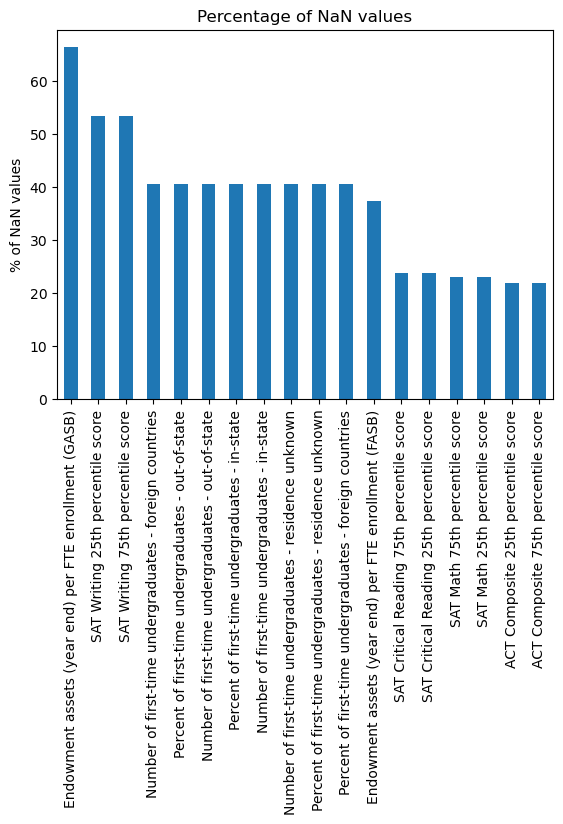

In [5]:
na_columns = (data.isna().sum().sort_values(ascending = False) / data.shape[0]) * 100
threshold = 20

na_columns_perc = na_columns[na_columns >= threshold]
print(na_columns_perc)

ax = na_columns_perc.plot.bar(title = "Percentage of NaN values")
ax.set_ylabel("% of NaN values")
plt.show()

In [6]:
data_copy = data.copy()
data_copy = data_copy.drop(na_columns_perc.index,axis = 1)

print(data_copy.shape)
data_copy.head()

(1534, 127)


,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,"-865,685","3,478,337",Not applicable,Implied no,...,97.0,89.0,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,"-868,092","3,350,223",Not applicable,Implied no,...,90.0,79.0,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,"-86,174","3,236,261",Churches of Christ,Implied no,...,100.0,90.0,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,"-866,384","3,472,282",Not applicable,Yes,...,87.0,77.0,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,"-862,957","3,236,432",Not applicable,Implied no,...,93.0,87.0,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0


In [7]:
interesting_columns=['Name', 'year', 'Highest degree offered', "Offers Bachelor's degree",
       "Offers Master's degree",
       "Offers Doctor's degree - research/scholarship",
       "Offers Doctor's degree - professional practice", 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total',]

data_copy = data_copy[interesting_columns]
data_copy.shape

(1534, 28)

In [8]:
indexes = data_copy.isna().sum(axis = 1)
indexes_na = indexes[indexes <= 10]
print(indexes_na)

data_copy = data_copy.iloc[indexes_na.index,:]
data_copy.shape

0       0
1       0
2       5
3       0
4       0
       ..
1529    5
1530    1
1531    9
1532    1
1533    8
Length: 1532, dtype: int64


(1532, 28)

In [9]:
numeric_columns = data_copy.select_dtypes(include = [int,float])
print(numeric_columns.columns)
print(numeric_columns[numeric_columns < 0].sum())

Index(['year', 'Applicants total', 'Admissions total', 'Enrolled total',
       'Estimated enrollment, total', 'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total'],
      dtype='object')
year                                                              0.0
Applicants total                                      

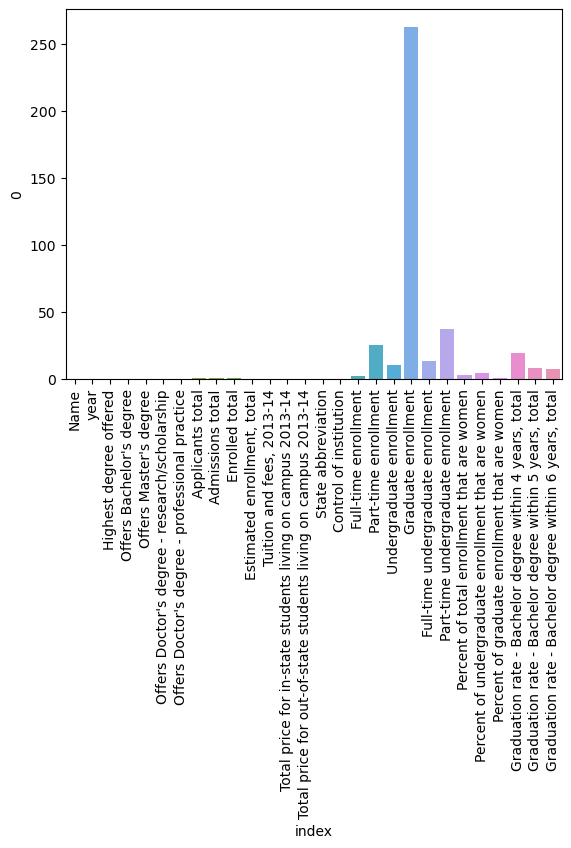

In [10]:
nb_zeros = data_copy[data_copy == 0].count()
nb_zeros = nb_zeros.reset_index()

ax = sns.barplot(nb_zeros,x = "index",y = 0)
plt.xticks(rotation = 90)
plt.show()

In [11]:
print("The total number of zero values in this data is "+ str(nb_zeros[0].sum()))

The total number of zero values in this data is 395


In [12]:
data_copy = data_copy.replace({0:np.NaN})

nb_zeros = data_copy[data_copy == 0].count().sum()
print("The total number of zero values in the new cleaned data is: "+ str(nb_zeros))

The total number of zero values in the new cleaned data is: 0


In [13]:
def remove_space(headers,charact):
    new_headers = []
    for header in headers:
        for char in charact:
            if char in header:
                header = header.replace(char,"_")
            header = header
        new_headers.append(header)
    return new_headers

In [14]:
def remove_sp_char(headers,charact):
    new_headers = []
    for header in headers:
        for char in charact:
            if char == "-" or char == '/':
                header = header.replace(char,"_")
            if char in header:
                header = header.replace(char,"")
        new_headers.append(header)
    return new_headers

In [15]:
headers = remove_space(data_copy.columns,[" - "," "])
headers = remove_sp_char(headers,["'",",",":","-","/"])

In [16]:
new_headers = []
for header in headers:
    header = header.casefold()
    
    if "degrese" in header: # One column name has a typo
        header = header.replace("degrese","degrees")
    
    new_headers.append(header)
    
data_copy.columns = new_headers
data_copy.columns

Index(['name', 'year', 'highest_degree_offered', 'offers_bachelors_degree',
       'offers_masters_degree', 'offers_doctors_degree_research_scholarship',
       'offers_doctors_degree_professional_practice', 'applicants_total',
       'admissions_total', 'enrolled_total', 'estimated_enrollment_total',
       'tuition_and_fees_2013_14',
       'total_price_for_in_state_students_living_on_campus_2013_14',
       'total_price_for_out_of_state_students_living_on_campus_2013_14',
       'state_abbreviation', 'control_of_institution', 'full_time_enrollment',
       'part_time_enrollment', 'undergraduate_enrollment',
       'graduate_enrollment', 'full_time_undergraduate_enrollment',
       'part_time_undergraduate_enrollment',
       'percent_of_total_enrollment_that_are_women',
       'percent_of_undergraduate_enrollment_that_are_women',
       'percent_of_graduate_enrollment_that_are_women',
       'graduation_rate_bachelor_degree_within_4_years_total',
       'graduation_rate_bachelor_deg

In [17]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 1533
Data columns (total 28 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   name                                                            1532 non-null   object 
 1   year                                                            1532 non-null   int64  
 2   highest_degree_offered                                          1532 non-null   object 
 3   offers_bachelors_degree                                         1532 non-null   object 
 4   offers_masters_degree                                           1532 non-null   object 
 5   offers_doctors_degree_research_scholarship                      1532 non-null   object 
 6   offers_doctors_degree_professional_practice                     1532 non-null   object 
 7   applicants_total                                   

count     1376.000000
mean      6395.837936
std       8788.972944
min          4.000000
25%       1491.750000
50%       3360.000000
75%       7020.500000
max      72676.000000
Name: applicants_total, dtype: float64


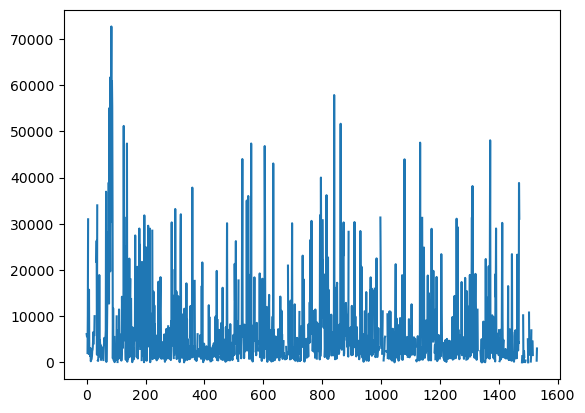

In [18]:
print(data_copy["applicants_total"].describe())
data_copy["applicants_total"].plot()
plt.show()

In [19]:
print(data_copy.iloc[data_copy["applicants_total"].idxmax(),0])
print(data_copy.iloc[data_copy["applicants_total"].idxmin(),0])

University of California-Los Angeles
Johnson State College


In [20]:
first_question = data_copy[["applicants_total","admissions_total","enrolled_total"]]
first_question.head()

,applicants_total,admissions_total,enrolled_total
0,6142.0,5521.0,1104.0
1,5689.0,4934.0,1773.0
2,NaN,NaN,NaN
3,2054.0,1656.0,651.0
4,10245.0,5251.0,1479.0


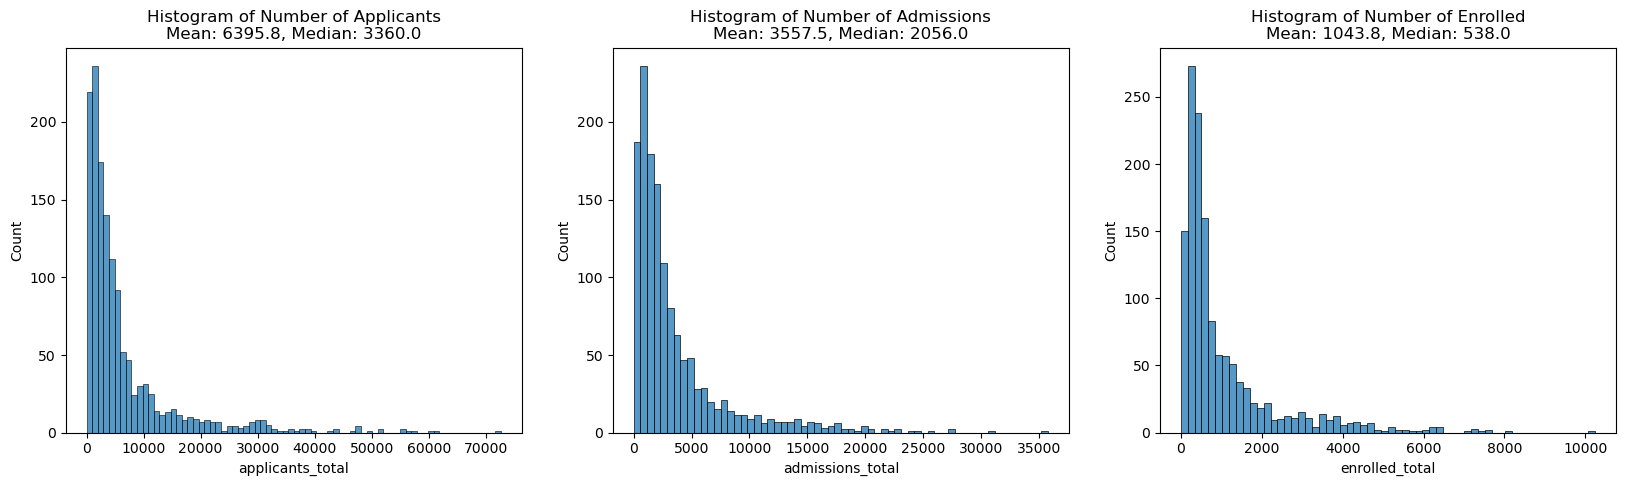

In [21]:
fig,ax = plt.subplots(1,3,figsize = (20,5))

sns.histplot(data = first_question,x = "applicants_total",ax = ax[0])
mean_ap = round(first_question["applicants_total"].mean(),1)
median_ap = round(first_question["applicants_total"].median(),1)
ax[0].set_title(f"Histogram of Number of Applicants\nMean: {mean_ap}, Median: {median_ap}")

sns.histplot(data = first_question,x = "admissions_total",ax = ax[1])
mean_ad = round(first_question["admissions_total"].mean(),1)
median_ad = round(first_question["admissions_total"].median(),1)
ax[1].set_title(f"Histogram of Number of Admissions\nMean: {mean_ad}, Median: {median_ad}")

sns.histplot(data = first_question,x = "enrolled_total",ax = ax[2])
mean_en = round(first_question["enrolled_total"].mean(),1)
median_en = round(first_question["enrolled_total"].median(),1)
ax[2].set_title(f"Histogram of Number of Enrolled\nMean: {mean_en}, Median: {median_en}")

plt.show()

In [22]:
first_question["enrollements_rate"] = first_question["enrolled_total"] / first_question["admissions_total"]
first_question.head()

C:\Users\mgpan\AppData\Local\Temp\ipykernel_1952\3928468568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_question["enrollements_rate"] = first_question["enrolled_total"] / first_question["admissions_total"]


,applicants_total,admissions_total,enrolled_total,enrollements_rate
0,6142.0,5521.0,1104.0,0.199964
1,5689.0,4934.0,1773.0,0.359343
2,NaN,NaN,NaN,NaN
3,2054.0,1656.0,651.0,0.393116
4,10245.0,5251.0,1479.0,0.281661


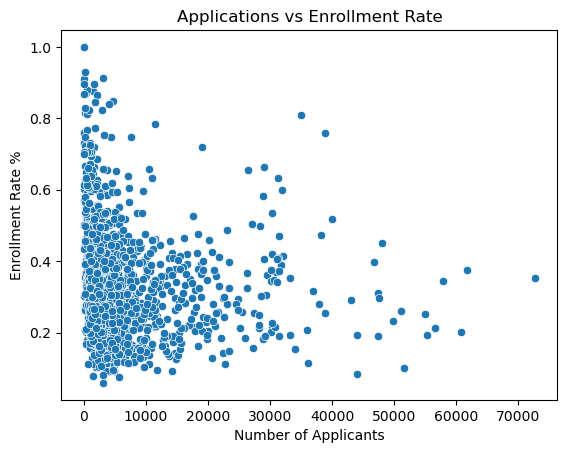

In [23]:
sns.scatterplot(data = first_question,x = "applicants_total",y = "enrollements_rate")
plt.title("Applications vs Enrollment Rate")
plt.xlabel("Number of Applicants")
plt.ylabel("Enrollment Rate %")
plt.show()

In [24]:
first_question[["applicants_total","enrollements_rate"]].corr()

,applicants_total,enrollements_rate
applicants_total,1.000000,-0.111293
enrollements_rate,-0.111293,1.000000


In [25]:
second_question = data_copy[["applicants_total","admissions_total","enrolled_total"]]
second_question.head()

,applicants_total,admissions_total,enrolled_total
0,6142.0,5521.0,1104.0
1,5689.0,4934.0,1773.0
2,NaN,NaN,NaN
3,2054.0,1656.0,651.0
4,10245.0,5251.0,1479.0


In [26]:
second_question["admissions_rate"] = second_question["admissions_total"] / second_question["applicants_total"]

second_question["enrollements_rate"] = second_question["enrolled_total"] / second_question["admissions_total"]

second_question.head()

C:\Users\mgpan\AppData\Local\Temp\ipykernel_1952\700194616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_question["admissions_rate"] = second_question["admissions_total"] / second_question["applicants_total"]
C:\Users\mgpan\AppData\Local\Temp\ipykernel_1952\700194616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_question["enrollements_rate"] = second_question["enrolled_total"] / second_question["admissions_total"]


,applicants_total,admissions_total,enrolled_total,admissions_rate,enrollements_rate
0,6142.0,5521.0,1104.0,0.898893,0.199964
1,5689.0,4934.0,1773.0,0.867288,0.359343
2,NaN,NaN,NaN,NaN,NaN
3,2054.0,1656.0,651.0,0.806232,0.393116
4,10245.0,5251.0,1479.0,0.512543,0.281661


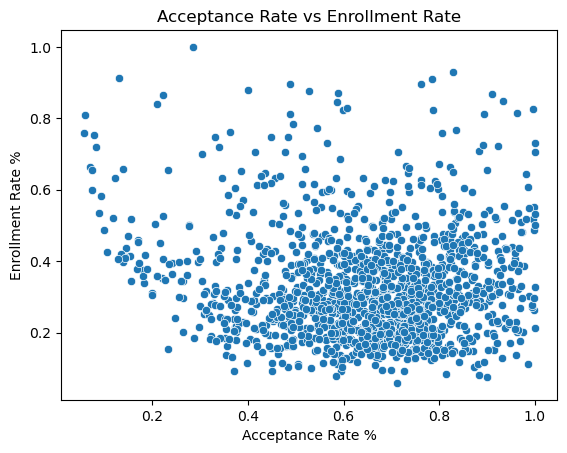

In [27]:
sns.scatterplot(data = second_question,x = "admissions_rate",y = "enrollements_rate")

plt.title("Acceptance Rate vs Enrollment Rate")
plt.xlabel("Acceptance Rate %")
plt.ylabel("Enrollment Rate %")

plt.show()

In [28]:
second_question[["admissions_rate","enrollements_rate"]].corr()

,admissions_rate,enrollements_rate
admissions_rate,1.000000,-0.071669
enrollements_rate,-0.071669,1.000000


In [29]:
third_question = data_copy[["control_of_institution","applicants_total","enrolled_total"]]
third_question.head()

,control_of_institution,applicants_total,enrolled_total
0,Public,6142.0,1104.0
1,Public,5689.0,1773.0
2,Private not-for-profit,NaN,NaN
3,Public,2054.0,651.0
4,Public,10245.0,1479.0


In [30]:
np.unique(third_question["control_of_institution"])

array(['Private not-for-profit', 'Public'], dtype=object)

C:\Users\mgpan\AppData\Local\Temp\ipykernel_1952\3720121273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third_question["enrollments_rate"] = third_question["applicants_total"] / third_question["enrolled_total"]


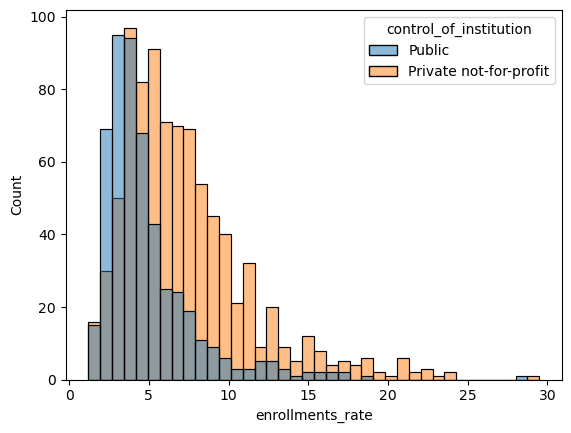

In [31]:
third_question["enrollments_rate"] = third_question["applicants_total"] / third_question["enrolled_total"]

sns.histplot(data = third_question,x = "enrollments_rate",hue = "control_of_institution")
plt.show()

we can conclude that, in fact, there is a students’ preference for public universities

4 Do students prefer a university because of its low tuition and fees?

In [32]:
forth_question = data_copy[["applicants_total","enrolled_total","tuition_and_fees_2013_14"]]
forth_question.head()

,applicants_total,enrolled_total,tuition_and_fees_2013_14
0,6142.0,1104.0,7182.0
1,5689.0,1773.0,7206.0
2,NaN,NaN,6870.0
3,2054.0,651.0,9192.0
4,10245.0,1479.0,8720.0


In [33]:
forth_question["enrollments_rate"] = forth_question["enrolled_total"] / forth_question["applicants_total"]
forth_question.head()

C:\Users\mgpan\AppData\Local\Temp\ipykernel_1952\3224873957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forth_question["enrollments_rate"] = forth_question["enrolled_total"] / forth_question["applicants_total"]


,applicants_total,enrolled_total,tuition_and_fees_2013_14,enrollments_rate
0,6142.0,1104.0,7182.0,0.179746
1,5689.0,1773.0,7206.0,0.311654
2,NaN,NaN,6870.0,NaN
3,2054.0,651.0,9192.0,0.316943
4,10245.0,1479.0,8720.0,0.144363


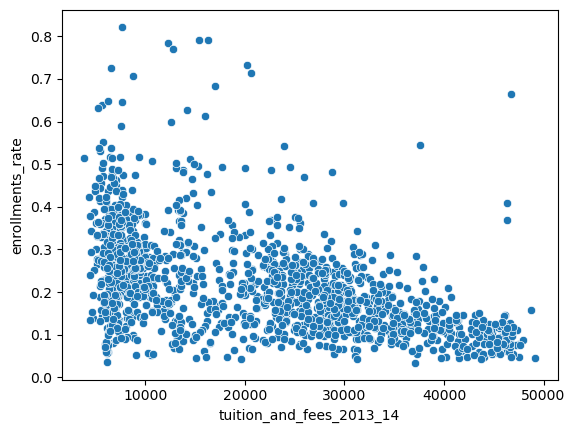

In [34]:
sns.scatterplot(data = forth_question,x = "tuition_and_fees_2013_14",y = "enrollments_rate")
plt.show()

In [35]:
forth_question_prefered = forth_question[forth_question["enrollments_rate"] > 0.5]
forth_question_prefered.head()

,applicants_total,enrolled_total,tuition_and_fees_2013_14,enrollments_rate
15,462.0,380.0,7660.0,0.822511
48,3659.0,2157.0,7595.0,0.589505
95,82.0,60.0,20200.0,0.731707
204,383.0,196.0,14490.0,0.511749
213,4620.0,3658.0,16284.0,0.791775


In [36]:
bins = [0,20000,40000,50000]
labels = ["Low","Medium","High"]
forth_question_prefered["tuition_and_fees_category"] = pd.cut(forth_question_prefered["tuition_and_fees_2013_14"],bins = bins,labels = labels)
forth_question_prefered.head()

C:\Users\mgpan\AppData\Local\Temp\ipykernel_1952\1716408857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forth_question_prefered["tuition_and_fees_category"] = pd.cut(forth_question_prefered["tuition_and_fees_2013_14"],bins = bins,labels = labels)


,applicants_total,enrolled_total,tuition_and_fees_2013_14,enrollments_rate,tuition_and_fees_category
15,462.0,380.0,7660.0,0.822511,Low
48,3659.0,2157.0,7595.0,0.589505,Low
95,82.0,60.0,20200.0,0.731707,Medium
204,383.0,196.0,14490.0,0.511749,Low
213,4620.0,3658.0,16284.0,0.791775,Low


In [37]:
forth_question_prefered.groupby("tuition_and_fees_category")[["tuition_and_fees_2013_14","enrollments_rate"]].agg([np.mean,np.median])

tuition_and_fees_2013_14          enrollments_rate  \
                                              mean   median             mean   
tuition_and_fees_category                                                      
Low                                        9405.00   7617.0         0.614991   
Medium                                    25589.75  22279.5         0.633298   
High                                      46713.00  46713.0         0.665138   

                                     
                             median  
tuition_and_fees_category            
Low                        0.598967  
Medium                     0.629206  
High                       0.665138

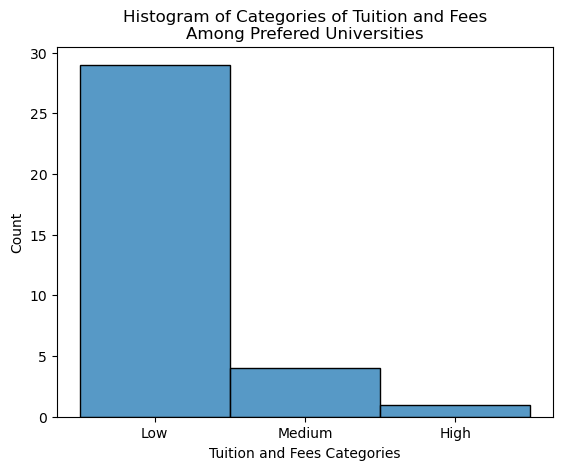

In [38]:
sns.histplot(data = forth_question_prefered,x = "tuition_and_fees_category")

plt.title("Histogram of Categories of Tuition and Fees\nAmong Prefered Universities")
plt.xlabel("Tuition and Fees Categories")
plt.show()

We can see that the more the fees the less the admission yield, So students prefer universties with low fees

 Do students prefer a university for its low cost of on-campus living?

In [39]:
interest = ["applicants_total","enrolled_total","control_of_institution","total_price_for_in_state_students_living_on_campus_2013_14","total_price_for_out_of_state_students_living_on_campus_2013_14"]

fifth_question = data_copy[interest]
fifth_question["enrollments_rate"] = fifth_question["enrolled_total"] / fifth_question["applicants_total"]

fifth_question.head()

C:\Users\mgpan\AppData\Local\Temp\ipykernel_1952\2929577522.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifth_question["enrollments_rate"] = fifth_question["enrolled_total"] / fifth_question["applicants_total"]


,applicants_total,enrolled_total,control_of_institution,total_price_for_in_state_students_living_on_campus_2013_14,total_price_for_out_of_state_students_living_on_campus_2013_14,enrollments_rate
0,6142.0,1104.0,Public,21849.0,27441.0,0.179746
1,5689.0,1773.0,Public,22495.0,31687.0,0.311654
2,NaN,NaN,Private not-for-profit,NaN,NaN,NaN
3,2054.0,651.0,Public,23466.0,35780.0,0.316943
4,10245.0,1479.0,Public,18286.0,25222.0,0.144363


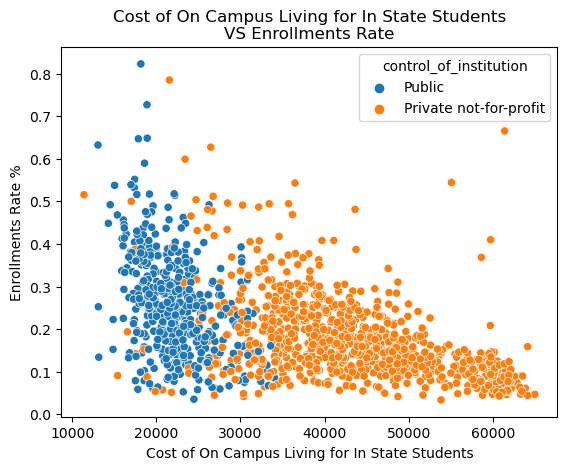

In [40]:
sns.scatterplot(data = fifth_question,x = "total_price_for_in_state_students_living_on_campus_2013_14",y = "enrollments_rate",hue = "control_of_institution")

plt.title("Cost of On Campus Living for In State Students\nVS Enrollments Rate")
plt.xlabel("Cost of On Campus Living for In State Students")
plt.ylabel("Enrollments Rate %")
plt.show()

In [41]:
fifth_question[["enrollments_rate","total_price_for_in_state_students_living_on_campus_2013_14"]].corr()

,enrollments_rate,total_price_for_in_state_students_living_on_campus_2013_14
enrollments_rate,1.000000,-0.513578
total_price_for_in_state_students_living_on_campus_2013_14,-0.513578,1.000000


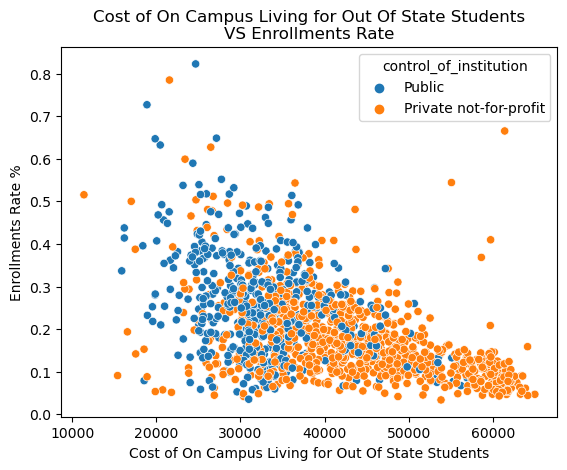

In [42]:
sns.scatterplot(data = fifth_question,x = "total_price_for_out_of_state_students_living_on_campus_2013_14",y = "enrollments_rate",hue = "control_of_institution")

plt.title("Cost of On Campus Living for Out Of State Students\nVS Enrollments Rate")
plt.xlabel("Cost of On Campus Living for Out Of State Students")
plt.ylabel("Enrollments Rate %")
plt.show()

In [43]:
fifth_question[["enrollments_rate","total_price_for_out_of_state_students_living_on_campus_2013_14"]].corr()

,enrollments_rate,total_price_for_out_of_state_students_living_on_campus_2013_14
enrollments_rate,1.000000,-0.514047
total_price_for_out_of_state_students_living_on_campus_2013_14,-0.514047,1.000000


In general, the average cost offered by public universities is lower than the cost offered by private universities.

students, in general, prefer universities with affordable costs of on-campus living.

Do students prefer universities from highly populated states?

In [45]:
interest = ["applicants_total","enrolled_total","control_of_institution","state_abbreviation"]

sixth_question = data_copy[interest]
sixth_question["enrollments_rate"] = sixth_question["enrolled_total"] / sixth_question["applicants_total"]


sixth_question.head()

C:\Users\mgpan\AppData\Local\Temp\ipykernel_1952\2695087598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sixth_question["enrollments_rate"] = sixth_question["enrolled_total"] / sixth_question["applicants_total"]


,applicants_total,enrolled_total,control_of_institution,state_abbreviation,enrollments_rate
0,6142.0,1104.0,Public,Alabama,0.179746
1,5689.0,1773.0,Public,Alabama,0.311654
2,NaN,NaN,Private not-for-profit,Alabama,NaN
3,2054.0,651.0,Public,Alabama,0.316943
4,10245.0,1479.0,Public,Alabama,0.144363


In [46]:
popular_states = ['California', 'Florida', 'Texas', 'New York', 'Pennsylvania']
sixth_question["popular_state"] = sixth_question["state_abbreviation"].apply(lambda x: True if x in popular_states else False)

sixth_question.head()

C:\Users\mgpan\AppData\Local\Temp\ipykernel_1952\1901550965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sixth_question["popular_state"] = sixth_question["state_abbreviation"].apply(lambda x: True if x in popular_states else False)


,applicants_total,enrolled_total,control_of_institution,state_abbreviation,enrollments_rate,popular_state
0,6142.0,1104.0,Public,Alabama,0.179746,False
1,5689.0,1773.0,Public,Alabama,0.311654,False
2,NaN,NaN,Private not-for-profit,Alabama,NaN,False
3,2054.0,651.0,Public,Alabama,0.316943,False
4,10245.0,1479.0,Public,Alabama,0.144363,False


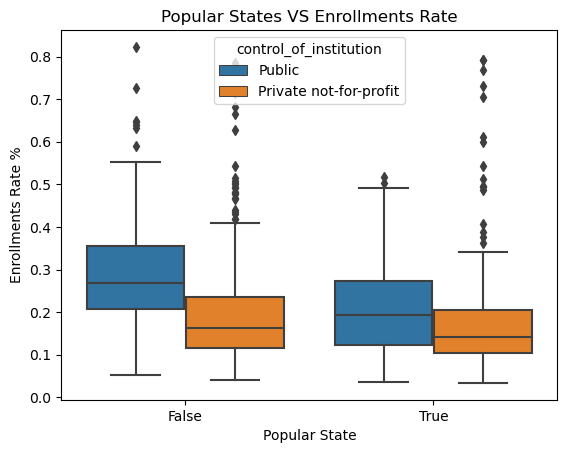

In [47]:
sns.boxplot(data = sixth_question,x = "popular_state",y = "enrollments_rate",hue = "control_of_institution")

plt.title("Popular States VS Enrollments Rate")
plt.xlabel("Popular State")
plt.ylabel("Enrollments Rate %")
plt.show()

We can see that the less populated regions the more the admission rate



Do students prefer a university based on the possibility of a higher, additional academic degree in the same university?

In [48]:
degree_offers = ['highest_degree_offered', 'offers_bachelors_degree',
       'offers_masters_degree', 'offers_doctors_degree_research_scholarship',
       'offers_doctors_degree_professional_practice']

seventh_question = data_copy[degree_offers + ["applicants_total"] + ["enrolled_total"]]
seventh_question["enrollments_rate"] = seventh_question["enrolled_total"] / seventh_question["applicants_total"]

seventh_question.head()

C:\Users\mgpan\AppData\Local\Temp\ipykernel_1952\2638030098.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seventh_question["enrollments_rate"] = seventh_question["enrolled_total"] / seventh_question["applicants_total"]


,highest_degree_offered,offers_bachelors_degree,offers_masters_degree,offers_doctors_degree_research_scholarship,offers_doctors_degree_professional_practice,applicants_total,enrolled_total,enrollments_rate
0,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,1104.0,0.179746
1,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,1773.0,0.311654
2,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,NaN,NaN,NaN
3,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,651.0,0.316943
4,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,1479.0,0.144363


In [49]:
percentages = seventh_question["highest_degree_offered"].value_counts(normalize = True) * 100
percentages

Master's degree                                                     38.315927
Doctor's degree - research/scholarship and professional practice    20.300261
Bachelor's degree                                                   18.407311
Doctor's degree - research/scholarship                              13.054830
Doctor's degree - professional practice                              8.093995
Doctor's degree - other                                              1.827676
Name: highest_degree_offered, dtype: float64

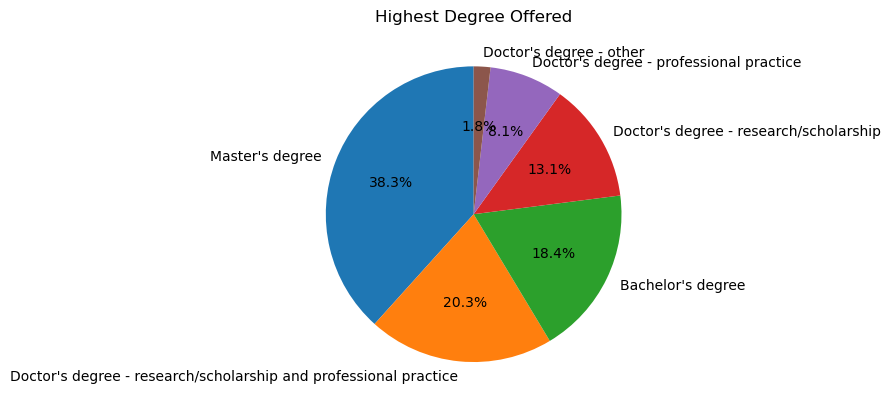

In [50]:
plt.pie(percentages.values,labels = percentages.index, autopct='%1.1f%%', startangle=90)

plt.title("Highest Degree Offered")
plt.show()

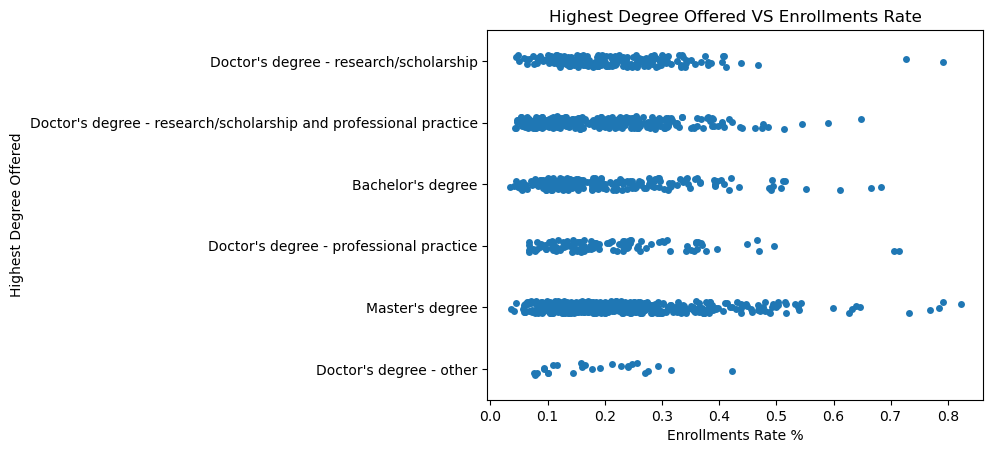

In [51]:
sns.stripplot(data = seventh_question,x = "enrollments_rate",y = "highest_degree_offered")

plt.title("Highest Degree Offered VS Enrollments Rate")
plt.xlabel("Enrollments Rate %")
plt.ylabel("Highest Degree Offered")
plt.show()

So there alot of collage that deosn't have a higher degree and still have a high rate of admission

Inferences and Conclusions.

A high number of applications does not imply that a university is preferred among students.

Students do not necessarily prefer a university because of its high acceptance rate or, in other words, the students’ preference is not based on how easy it is for them to be admitted to a university.

There is a strong students’ preference for public universities.

Two of the main reasons why public universities are preferred by students are: first, on average public universities present more affordable tuition and fees than private universities; second, public universities have more affordable on-campus living costs.

Students, in general, prefer universities with affordable costs of on-campus living.

When students look for a university to study for a Bachelor’s degree, they do not frequently choose the university thinking about a future possibility of pursuing a higher degree at the same university